In [39]:
#importing library for reading, writing and perform basic operations
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [40]:
import warnings
warnings.simplefilter("ignore")

In [41]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC

In [42]:
train=pd.read_csv("blood-train.csv")
test=pd.read_csv("blood-test.csv")

In [43]:
train["Made Donation in March 2007"].value_counts()

0    438
1    138
Name: Made Donation in March 2007, dtype: int64

In [44]:
y=train.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    0
Name: Made Donation in March 2007, dtype: int64

In [45]:
old_train=train
train=train.iloc[:,1:5]
test=test.iloc[:,1:5]

In [46]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [47]:
df=pd.merge(train,test)

In [48]:
x=df.iloc[:,:]
x.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
0,2,2,500,4
1,2,2,500,4
2,2,2,500,4
3,2,2,500,4
4,2,2,500,4


In [49]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347
std,8.175454,5.740010,1435.002556,24.227672
min,0.000000,1.000000,250.000000,2.000000
25%,2.000000,2.000000,500.000000,16.000000
50%,7.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,49.250000
max,74.000000,50.000000,12500.000000,98.000000


<AxesSubplot:ylabel='Months since Last Donation'>

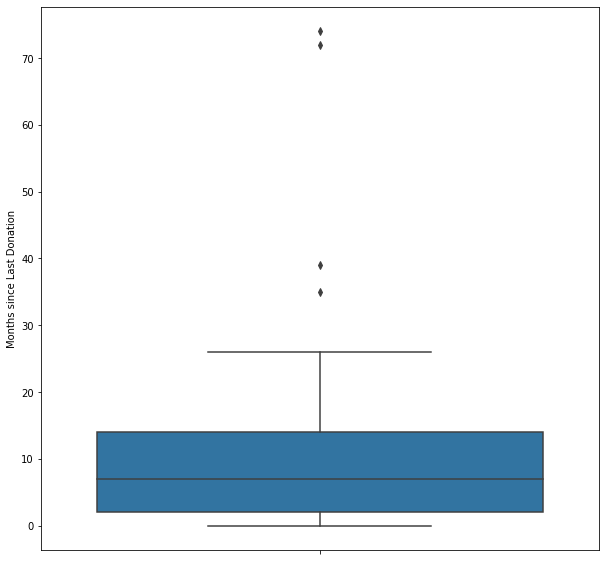

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(y="Months since Last Donation",data=old_train)

<AxesSubplot:>

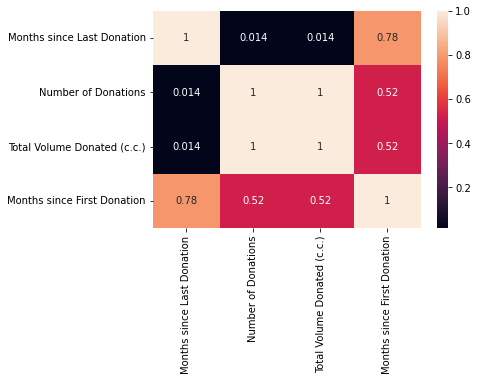

In [51]:
corr=x.corr()
sns.heatmap(corr,annot=True)

In [52]:
train["Months since Last Donation"].unique()

array([ 2,  0,  1,  4,  5,  3, 12,  6, 11,  9, 10, 13, 14,  8,  7, 16, 23,
       21, 18, 22, 26, 35, 74, 15, 20, 17, 25, 39, 72], dtype=int64)

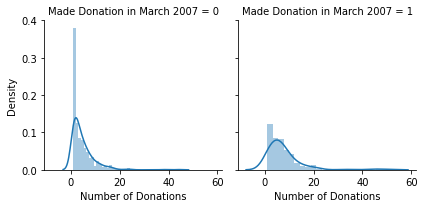

In [53]:
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Number of Donations")

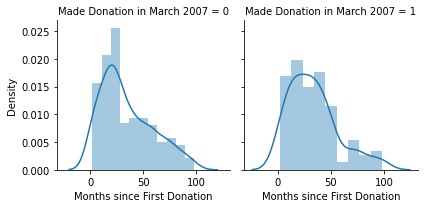

In [54]:
#Exploring Months Since First Donation
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Months since First Donation")

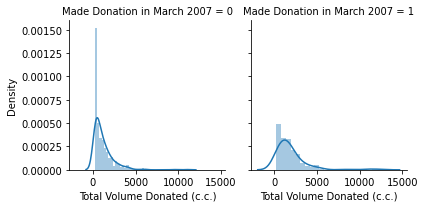

In [55]:
#Exploring Total Volume Donated
g = sns.FacetGrid(old_train, col='Made Donation in March 2007')
g = g.map(sns.distplot, "Total Volume Donated (c.c.)")

In [56]:
x["Donating for"] = (x["Months since First Donation"] - x["Months since Last Donation"])

In [57]:
x.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Donating for
0,2,2,500,4,2
1,2,2,500,4,2
2,2,2,500,4,2
3,2,2,500,4,2
4,2,2,500,4,2


<AxesSubplot:>

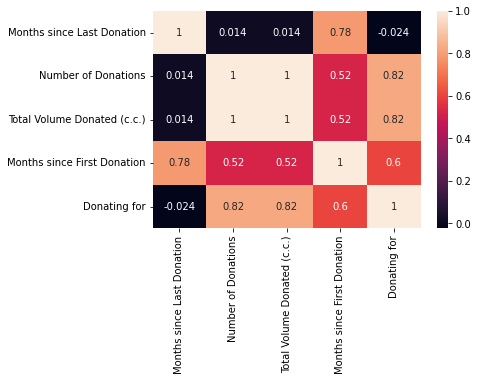

In [58]:
corr=x.corr()
sns.heatmap(corr,annot=True)

In [59]:
#Dropping the unnecessary column
x.drop([ 'Total Volume Donated (c.c.)'], axis=1, inplace=True)

In [60]:
x.head()

,Months since Last Donation,Number of Donations,Months since First Donation,Donating for
0,2,2,4,2
1,2,2,4,2
2,2,2,4,2
3,2,2,4,2
4,2,2,4,2


In [61]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [62]:
train=x[:576]

In [63]:
train

array([[-0.81293718,  1.30733072, -0.50685502,  0.23079376],
       [-0.81293718,  1.30733072, -0.50685502,  0.23079376],
       [-0.81293718,  1.30733072, -0.50685502,  0.23079376],
       ...,
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024]])

In [64]:
test=x[576:]

In [65]:
test

array([[ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.1242409 ,  1.30733072,  0.78378492, -0.18556024],
       [ 1.44710391,  7.667318  ,  3.49412879,  3.76980282],
       [ 0.63994638, -0.2826661 ,  0.39659294, -0.18556024],
       [ 0.63994638, -0.2826661 ,  0.39659294, -0.18556024],
       [ 0.63994638, -0.2826661 ,  0.39659294, -0.18556024],
       [ 0.63994638, -0.2826661 ,  0.39659294, -0.18556024],
       [ 0.63994638, -0.2826661 ,  0.39659294, -0.18556024],
       [ 0.63994638, -0.

In [66]:
train.shape

(576, 4)

In [67]:
test.shape

(234, 4)

In [69]:
#Splitting into train and test set
xtrain,xtest,ytrain,ytest=train_test_split(train,y,test_size=0.2,random_state=0)

In [75]:
log_model=LogisticRegression(random_state=7)
log_model.fit(xtrain,ytrain)

LogisticRegression(random_state=7)

In [76]:
pred=log_model.predict(xtest)

In [77]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [78]:
svm_model=SVC(probability=True)
svm_model.fit(train,y)

SVC(probability=True)

In [79]:
confusion_matrix(pred,ytest)

array([[80, 32],
       [ 1,  3]], dtype=int64)

In [80]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [83]:
rfc_model=RandomForestClassifier()
rfc_model.fit(xtrain,ytrain)

RandomForestClassifier()

In [85]:
pred=rfc_model.predict(xtest)

In [86]:
confusion_matrix(pred,ytest)

array([[79, 25],
       [ 2, 10]], dtype=int64)

In [87]:
roc_auc_score(pred,ytest)

0.796474358974359

In [88]:
dct_model=DecisionTreeClassifier(max_leaf_nodes=4,max_features=3,max_depth=15)

In [90]:
dct_model.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=15, max_features=3, max_leaf_nodes=4)

In [91]:
pred=model.predict(xtest)

In [92]:
confusion_matrix(pred,ytest)

array([[80, 32],
       [ 1,  3]], dtype=int64)

In [93]:
accuracy_score(pred,ytest)

0.7155172413793104

In [94]:
roc_auc_score

<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>

In [96]:
clf_neural = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(25,),random_state=1)
clf_neural.fit(train, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(25,), random_state=1,
              solver='lbfgs')

In [97]:
print('Predicting...\nIn Test Data')
predicted = clf_neural.predict(xtest)

Predicting...
In Test Data


In [98]:
confusion_matrix(predicted,ytest)

array([[80, 24],
       [ 1, 11]], dtype=int64)

In [102]:
roc_auc_score(pred,ytest)

0.7321428571428571

In [103]:
x=accuracy_score(predicted,ytest)